In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv('stats.csv', header=[0,1])

In [3]:
t0 = 39.921

In [4]:
df.loc[:, ('Task_id','Cores')] = df.loc[:, ('Task_id', 'Nodes')]*df.loc[:, ('Task_id', 'Threads')]

In [5]:
df

Task_id               1                          2                     \
    Nodes Threads    Time Speedup Efficiency    Time Speedup Efficiency   
0       2       2  13.563   2.943      0.736  13.698   2.914      0.729   
1       2       4  12.139   3.289      0.411  11.373   3.510      0.439   
2       2       8   5.263   7.585      0.474   5.470   7.298      0.456   
3       4       2   9.831   4.061      0.508   9.469   4.216      0.527   
4       4       4   6.701   5.957      0.372   6.561   6.085      0.380   
5       4       8   3.698  10.795      0.337   3.828   3.828      0.120   
6       8       2   5.622   7.101      0.444   5.980   6.676      0.417   
7       8       4   4.044   9.872      0.309   3.860  10.342      0.323   
8       8       8   3.066  13.021      0.203   3.182  12.546      0.196   

               1              2                  1                      \
  Iso-efficiency Iso-efficiency Seq. Frac Estimate Sequential Fraction   
0         £14.33            NaN           0.119719            0.103403   
1            NaN            NaN           0.204621                 NaN   
2            NaN            NaN           0.073962                 NaN   
3            NaN            NaN           0.138565                 NaN   
4            NaN            NaN           0.112394                 NaN   
5            NaN            NaN           0.063366                 NaN   
6            NaN            NaN           0.083547                 NaN   
7            NaN            NaN           0.072306                 NaN   
8            NaN            NaN           0.062145                 NaN   

                   2                     Task_id  
  Seq. Frac Estimate Sequential Fraction   Cores  
0           0.124228            0.120719       4  
1           0.182743                 NaN       8  
2           0.079492                 NaN      16  
3           0.128219                 NaN       8  
4           0.108628                 NaN      16  
5           0.237402                 NaN      32  
6           0.093110                 NaN      16  
7           0.067554                 NaN      32  
8           0.065099                 NaN      64

In [6]:
df_grps = df.groupby(('Task_id', 'Nodes'))

In [30]:
def plot_agg_stat(stat, filename):
    plt.xscale('log')
    plt.xlabel('cores')
    plt.ylabel(stat[1])
    plt.xticks([2,3,4,6,8], [2,'',4,'',8])
    for i in [2,4,8]:
        plt.plot([2,4,8], df.loc[df['Task_id']['Nodes'] == i].loc[:,stat], label=f'nodes = {i}', marker='o')
    plt.legend()
    plt.title(f'{stat[1]} v/s no. of cores for Task {stat[0]}')
    plt.savefig(filename)


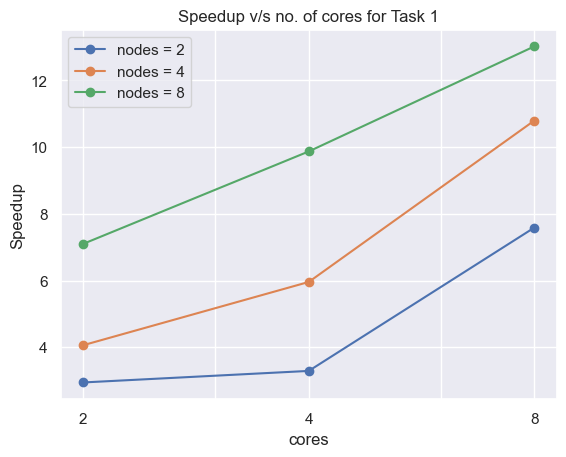

In [31]:
plot_agg_stat(('1', 'Speedup'), 'speedup_t1.pdf')

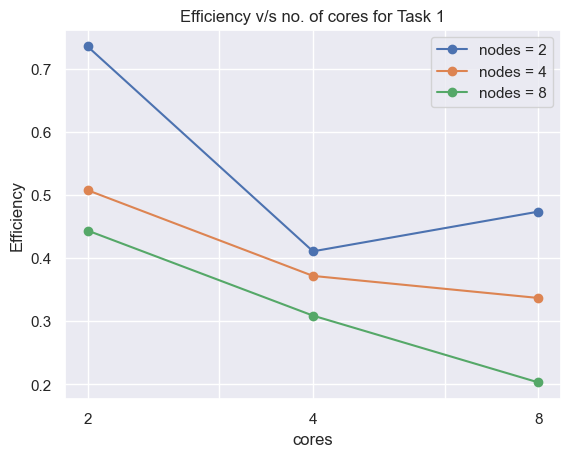

In [33]:
plot_agg_stat(('1', 'Efficiency'), 'efficiency_t1.pdf')

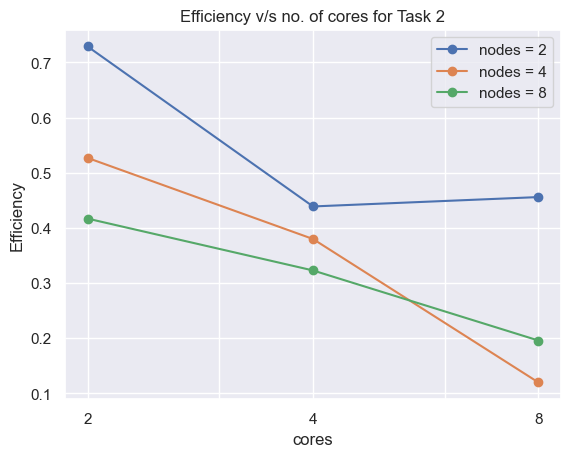

In [34]:
plot_agg_stat(('2', 'Efficiency'), 'efficiency_t2.pdf')

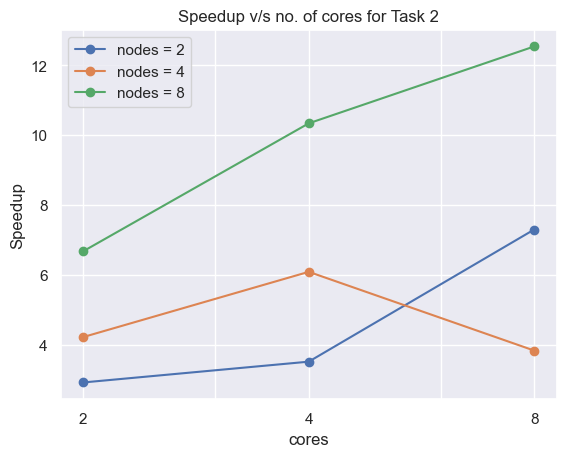

In [35]:
plot_agg_stat(('2', 'Speedup'), 'speedup_t2.pdf')